# Lending Club Case Study

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

To suppress bloated warnings we can use below lines of code

In [63]:
import warnings
warnings.filterwarnings(action='ignore')

### Data Understanding

In [64]:
# Load the file into a dataframe named 'loan_info_df'
loan_info_df = pd.read_csv("loan.csv", sep=",")

In [65]:
# See the top 5 entries to get a gist of the data
loan_info_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [66]:
loan_info_df.shape

(39717, 111)

In [67]:
# See the columns in the data
loan_info_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

- Based on the problem statement, our target variable would be ``loan_status``  
- We will be analyzing how this variable is affected by other variables to see if there are interesting patterns  
- Some of the important variables are ***annual income, grade, loan term, loan amount, purpose etc***

## Data Cleaning
We will now try to cleanup the data for better analysis

### 1. Identify Column with large number of NULL values

- One of the first things in data cleanup would be to analyze how many columns have null values.
- This will give an idea of columns need to be dropped, while which columns can augmented/suplemented looking at exsisting data if need to be 

In [68]:
# Identify those columns with more null/NaN values
round(loan_info_df.isnull().sum()/len(loan_info_df.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

##### Though there are no specific cutoff values for % of null values to identify columns to drop, we will take that as 90%. 

In [69]:
# Droppings the columns having more than 90% missing values
missing_columns = loan_info_df.columns[100*(loan_info_df.isnull().sum()/len(loan_info_df.index)) > 90]

In [70]:
print("Number of Columns with missing values greater than 90% ::", len(missing_columns))

Number of Columns with missing values greater than 90% :: 56


In [71]:
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [72]:
loan_info_df.drop(missing_columns, axis=1, inplace=True)
print(loan_info_df.shape)

(39717, 55)


### 2. Identify columns with repeated values

- Variance is a good measure to see columns with repeated values.
- These Columns can be removed

----------------

- Also some of these columns seems to be having the same value repeated several times.  
- Having those columns would serve no purpose as there are no variations. We can remove those columns too

In [73]:
# Identify the columns with low variance
low_variance_columns = loan_info_df.var()[loan_info_df.var() == 0].index.values
print(low_variance_columns)

['collections_12_mths_ex_med' 'policy_code' 'acc_now_delinq'
 'chargeoff_within_12_mths' 'delinq_amnt' 'tax_liens']


In [74]:
# Drop the low variance columns
loan_info_df.drop(low_variance_columns, axis=1, inplace=True)
print(loan_info_df.shape)

(39717, 49)


In [76]:
# Looking at the dataFrame now to see null columns
# Let's look at the columns now
100*(loan_info_df.isnull().sum()/len(loan_info_df.index))

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
pymnt_plan                  0.000000
url                         0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
i

#### description and months since last delinquent have relatively higher missing values. 

#### Let's see top 5 values for these


In [77]:
# description and months since last delinquent have relatively higher missing values. 
# Let's see top 5 values for these
loan_info_df[['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


- ``desc`` column seems to be textual description and at the moment we will drop this as we need NLP or some other technique to work with these information.

- ``mths_since_last_delinq`` can also be dropped as this data is not always available at the time someone applies loan. These are variables that come into picture once loan has been dispersed. However let us keep it for now and deal with this column later

In [78]:
# dropping decription
loan_info_df.drop(['desc'], axis=1, inplace=True)
print(loan_info_df.shape)

(39717, 48)


**We can also consider removing those entries (rows) which have lot of missing values (cells)**

In [79]:
# Checking whether some rows have more than 5 missing values
len(loan_info_df[loan_info_df.isnull().sum(axis=1) > 5].index)

0

***As seen above there are no such entries***

#### Checking the column data types

We need to also check if the columns are in the right format (data type).

In [80]:
loan_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [81]:
loan_info_df['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

In [82]:
# int_rate is character type appended with % , 
# But we can convert it to number by removing % and converting to numeric
loan_info_df['int_rate'] = loan_info_df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [83]:
# Another column is emp_length.
# This column seems to be having null values which would be problematic while trying to convert to number
# So we will drop such entries
loan_info_df.dropna(subset=['emp_length'], inplace=True)

In [84]:
# Now let us convert employment length to number
import re
loan_info_df['emp_length'] = loan_info_df['emp_length'].apply(lambda x: pd.to_numeric(re.findall('\d+', str(x))[0]))

In [85]:
loan_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38642 non-null  int64  
 1   member_id                38642 non-null  int64  
 2   loan_amnt                38642 non-null  int64  
 3   funded_amnt              38642 non-null  int64  
 4   funded_amnt_inv          38642 non-null  float64
 5   term                     38642 non-null  object 
 6   int_rate                 38642 non-null  float64
 7   installment              38642 non-null  float64
 8   grade                    38642 non-null  object 
 9   sub_grade                38642 non-null  object 
 10  emp_title                37202 non-null  object 
 11  emp_length               38642 non-null  int64  
 12  home_ownership           38642 non-null  object 
 13  annual_inc               38642 non-null  float64
 14  verification_status   

In [86]:
loan_info_df.shape

(38642, 48)

## Data Analysis

Based on the analysis of the data columns, some of these columns are related to loan repayment patterns. These data are not available and is only available once loan is sanctioned for a customer and will not be available for those who never applied for loan before.

We will here focus only on those variables which are available before loan is sanctioned. 

In [87]:
drop_columns = [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type",
  "mths_since_last_delinq"
]

In [88]:
# Dropping above columns
loan_info_df.drop(drop_columns, axis=1, inplace=True)
loan_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   member_id             38642 non-null  int64  
 2   loan_amnt             38642 non-null  int64  
 3   funded_amnt           38642 non-null  int64  
 4   funded_amnt_inv       38642 non-null  float64
 5   term                  38642 non-null  object 
 6   int_rate              38642 non-null  float64
 7   installment           38642 non-null  float64
 8   grade                 38642 non-null  object 
 9   sub_grade             38642 non-null  object 
 10  emp_title             37202 non-null  object 
 11  emp_length            38642 non-null  int64  
 12  home_ownership        38642 non-null  object 
 13  annual_inc            38642 non-null  float64
 14  verification_status   38642 non-null  object 
 15  issue_d            

##### ***Dropping columns from which more information cannot be gathered***

- We cannnot gather much info from address details like zip_code, address_state
- Variable 'title' is derived from the variable 'purpose'
- id and member_id are attached to users and would not be useful too

In [89]:
unusable_columns = ['id','member_id','url','title','zip_code','addr_state']
loan_info_df.drop(unusable_columns, axis=1, inplace=True)
loan_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38642 non-null  int64  
 1   funded_amnt           38642 non-null  int64  
 2   funded_amnt_inv       38642 non-null  float64
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  float64
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_title             37202 non-null  object 
 9   emp_length            38642 non-null  int64  
 10  home_ownership        38642 non-null  object 
 11  annual_inc            38642 non-null  float64
 12  verification_status   38642 non-null  object 
 13  issue_d               38642 non-null  object 
 14  loan_status           38642 non-null  object 
 15  pymnt_plan         

#### Target variable 'loan_status' is currently a string value

We need to see if we can convert it to a number so as to do mathematical analysis too

In [90]:
loan_info_df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

``Current`` is for those users who are still paying loan. We can skip those from our analysis as we don't know if they will pay up or default

- Since we can remove ``current`` we are now left with only 2 values for our target variable. 
- We can assign 0 for those who are ``Fully Paid`` an 1 for ``Charged Off``

In [91]:
# Removing all user who are tagged as current
loan_info_df = loan_info_df[loan_info_df['loan_status'] != 'Current']

# Converting loan_status to integer type
loan_info_df['loan_status'] = loan_info_df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
loan_info_df['loan_status'] = loan_info_df['loan_status'].apply(lambda x: pd.to_numeric(x))

# Summarising the values
loan_info_df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [92]:
# Let us add month and year of issuance for later analysis
from datetime import datetime
loan_info_df['issue_d'] = loan_info_df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
loan_info_df['month'] = loan_info_df['issue_d'].apply(lambda x: x.month)
loan_info_df['year'] = loan_info_df['issue_d'].apply(lambda x: x.year)


In [93]:
loan_info_df['month']

0        12
1        12
2        12
3        12
5        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: month, Length: 37544, dtype: int64

## Univariate Analysis

In [94]:
loan_info_df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

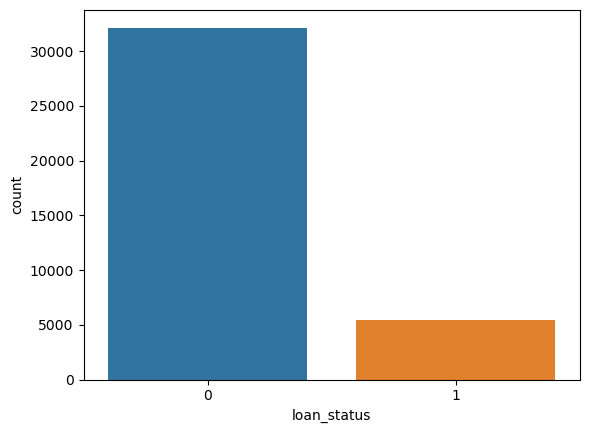

In [95]:
sns.countplot(x=loan_info_df['loan_status'])

***Clearly majority of the loans were paid off***

<Axes: xlabel='loan_amnt', ylabel='Density'>

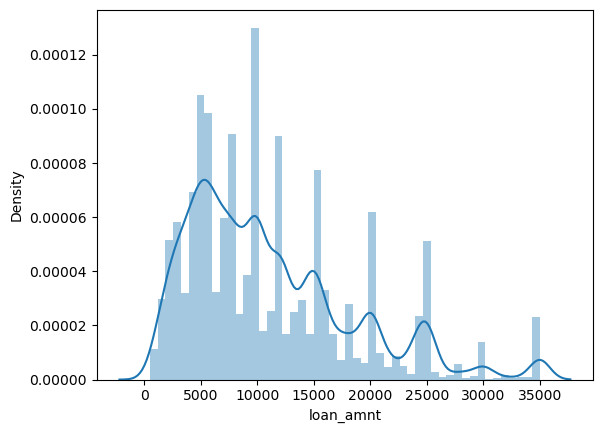

In [96]:
sns.distplot(loan_info_df['loan_amnt'])

***Most of the sanctioned loans are for lower amounts***

## Bivariate Analysis

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

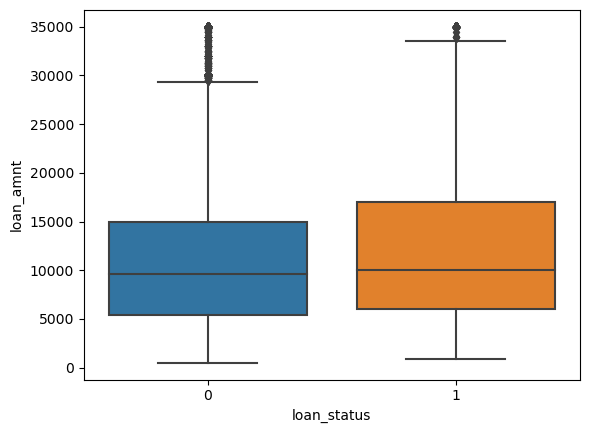

In [97]:
# Let us see the relationship between loan status and loan amount
sns.boxplot(x='loan_status', y='loan_amnt' ,data=loan_info_df)

***Higher loan amounts have higher default rate***

<Axes: xlabel='loan_status', ylabel='int_rate'>

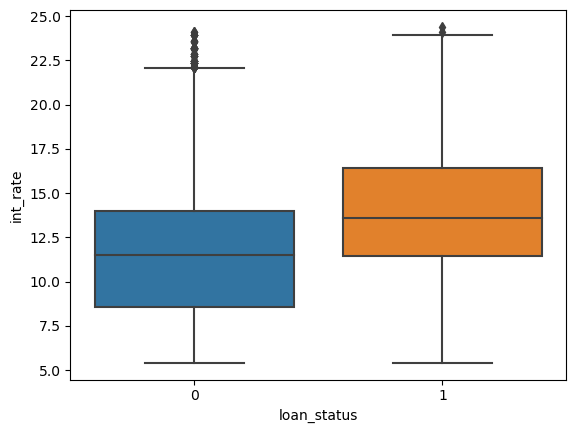

In [98]:
# Let us see the relationship between loan status and interest rate
sns.boxplot(x='loan_status', y='int_rate' ,data=loan_info_df)

***Higher interest rate seems to have higher default rate***

<Axes: xlabel='loan_status', ylabel='emp_length'>

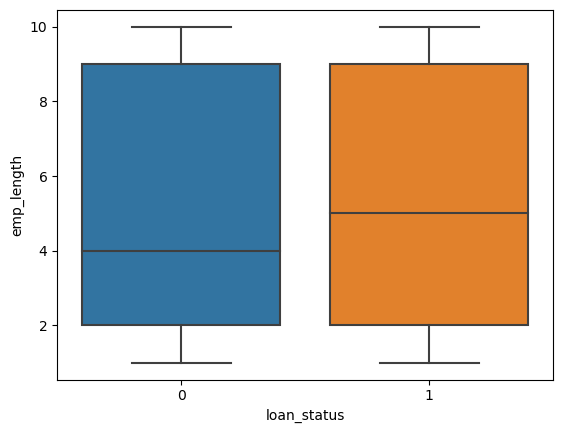

In [99]:
# Let us see the relationship between loan status and employment period
sns.boxplot(x='loan_status', y='emp_length' ,data=loan_info_df)

- ***There doesn't seem to be a very high correlation between loan status and employment length***
- ***However we can see that higher employment period has an average higher default rate***

#### Loan status vs Categorical variables

<Axes: xlabel='grade', ylabel='loan_status'>

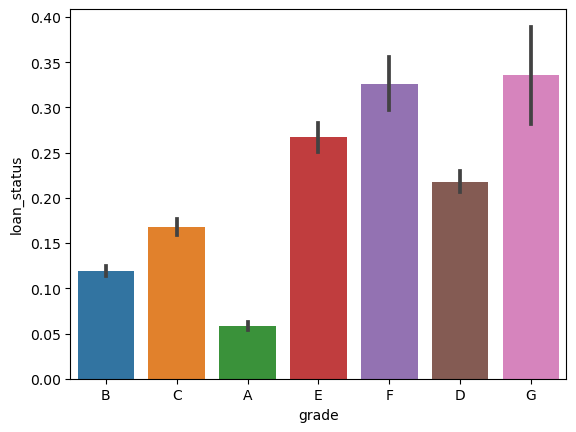

In [100]:
# Grade vs loan_status
sns.barplot(x='grade', y='loan_status', data=loan_info_df)

- ***We can see that the default rate increases as the grade goes from A to G.***
- ***This is expected as the the grade is decided based on riskiness of loan***

<Axes: xlabel='term', ylabel='loan_status'>

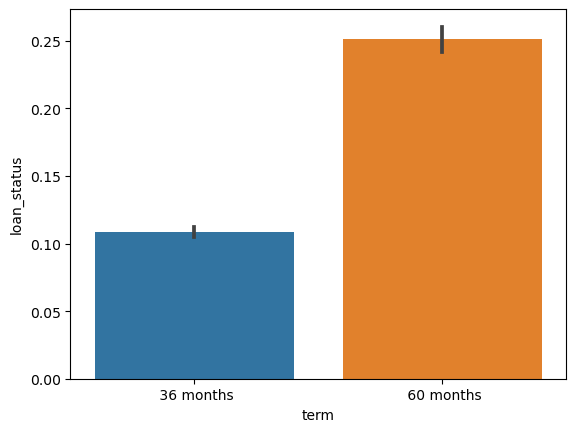

In [102]:
# effect of loan term/tenure 
sns.barplot(x='term', y='loan_status', data=loan_info_df)

***We can see that higher the loan term higher the default rate***

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

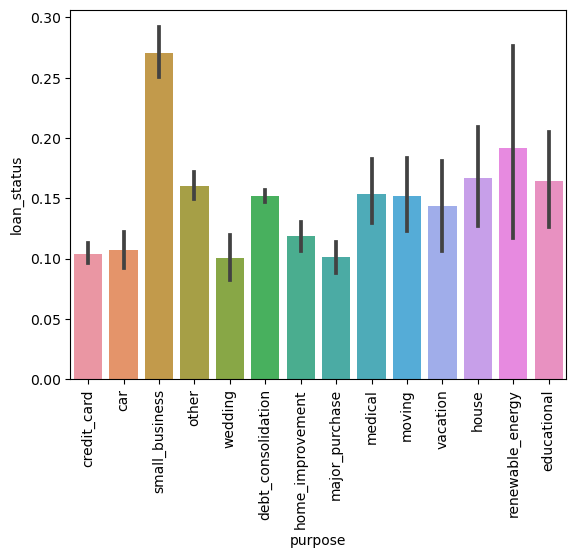

In [103]:
# loan purpose/type against loan status
sns.barplot(x='purpose', y='loan_status', data=loan_info_df)
plt.xticks(rotation=90)

***Small business seems to have highest default rate***

<Axes: xlabel='verification_status', ylabel='loan_status'>

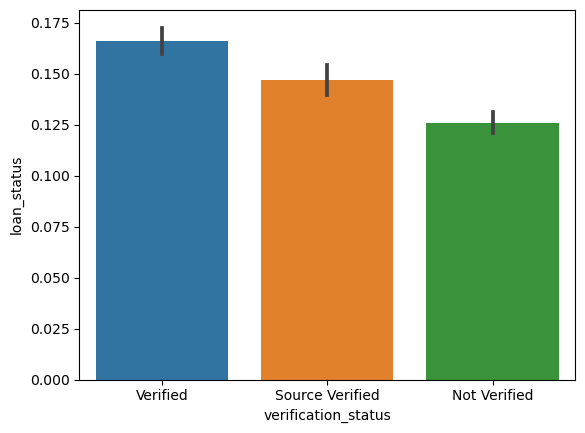

In [104]:
# Effect of verification status on loan status
sns.barplot(x='verification_status', y='loan_status', data=loan_info_df)

***Contrary to what would be expected, Verified loans have default more than the other***

<Axes: xlabel='home_ownership', ylabel='loan_status'>

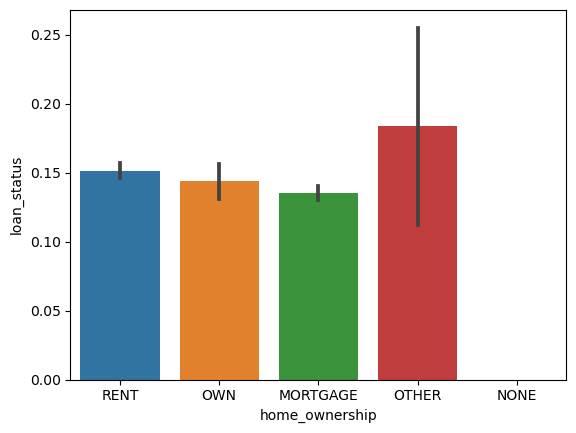

In [105]:
# Home ownership vs loan_status
sns.barplot(x='home_ownership', y='loan_status', data=loan_info_df)

- ***Home ownership doesn't seem to have much of an impact on the default state***

### Continuous variables

- One way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

In [106]:
# Make bin/bucket for annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'
loan_info_df['annual_inc'] = loan_info_df['annual_inc'].apply(lambda x: annual_income(x))
loan_info_df['annual_inc'].value_counts()

medium       17433
low          14678
high          3963
very high     1470
Name: annual_inc, dtype: int64

<Axes: xlabel='annual_inc', ylabel='loan_status'>

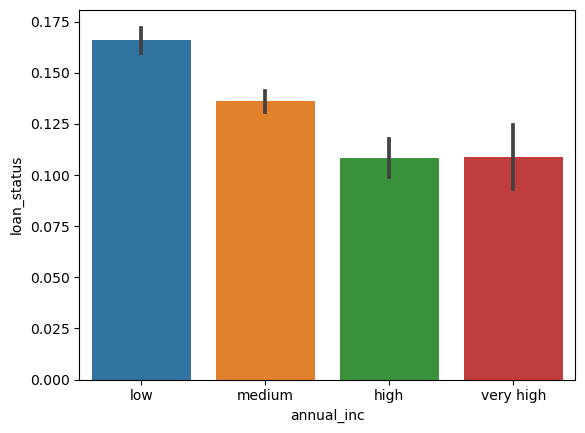

In [107]:
sns.barplot(x='annual_inc', y='loan_status', data=loan_info_df)

- ***loans given to low annual income group individuals tend to default more***

In [108]:
# Make buckets/bins loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan_info_df['loan_amnt'] = loan_info_df['loan_amnt'].apply(lambda x: loan_amount(x))
loan_info_df['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

<Axes: xlabel='loan_amnt', ylabel='loan_status'>

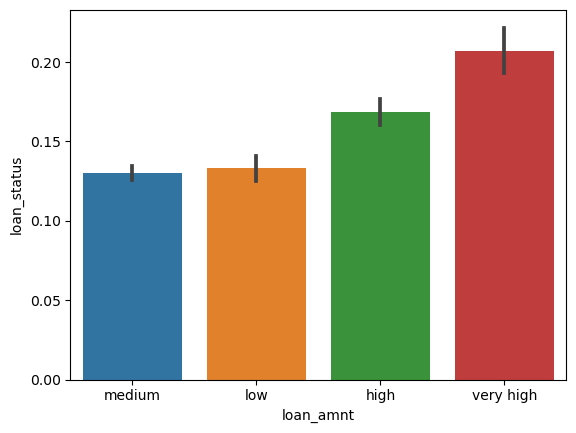

In [109]:
sns.barplot(x='loan_amnt', y='loan_status', data=loan_info_df)

- ***We can see that higher loan amount tends to defult more***

In [110]:
# Interest rate
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan_info_df['int_rate'] = loan_info_df['int_rate'].apply(lambda x: int_rate(x))

<Axes: xlabel='int_rate', ylabel='loan_status'>

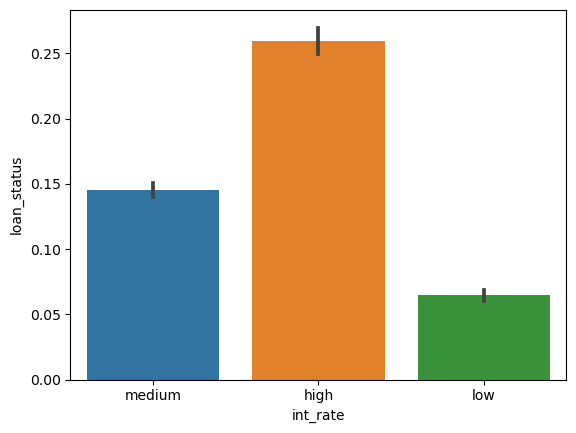

In [111]:
sns.barplot(x='int_rate', y='loan_status', data=loan_info_df)

- ***We can see that higher interest rate shows higher default rate***

## Segmented Univariate Analysis

Some of the important predictors indentified are purpose of the loan, interest rate, annual income, grade etc.
Let us take the case of loan purpose and group the distribution of loan status by purpose across different variables

In [112]:
loan_info_df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

***We will take top 4 purpose***

In [113]:
main_purposes = ['debt_consolidation','credit_card','other','home_improvement']
loan_info_df = loan_info_df[loan_info_df['purpose'].isin(main_purposes)]
loan_info_df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
Name: purpose, dtype: int64

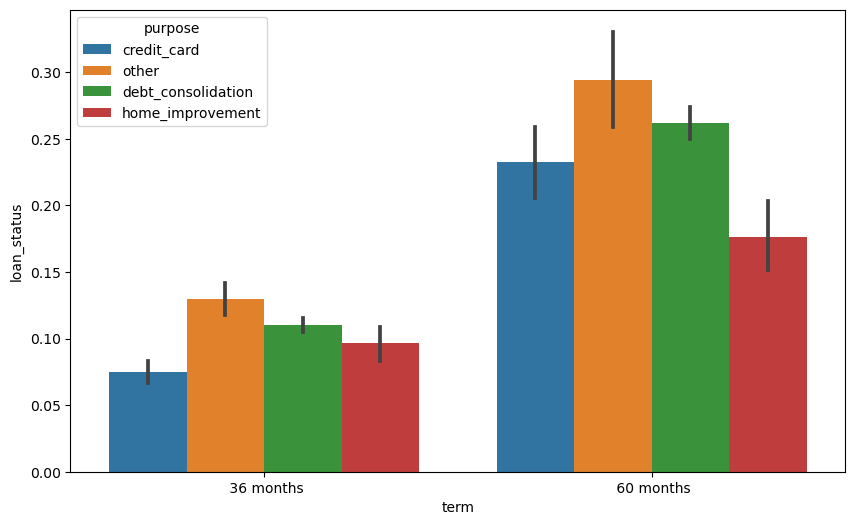

In [114]:
# Let us now see how default rate varies across terms and purpose
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan_info_df)
plt.show()

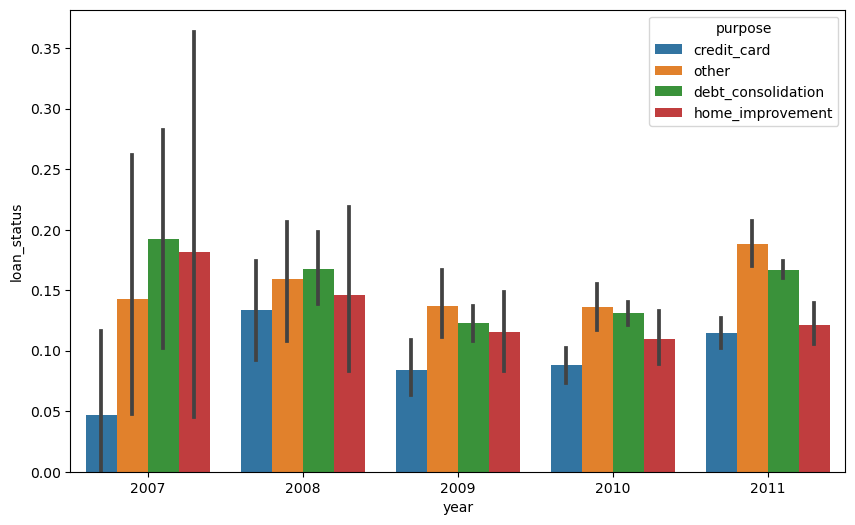

In [115]:
# Let us now see how default rate varies across year and purpose
plt.figure(figsize=[10, 6])
sns.barplot(x='year', y="loan_status", hue='purpose', data=loan_info_df)
plt.show()

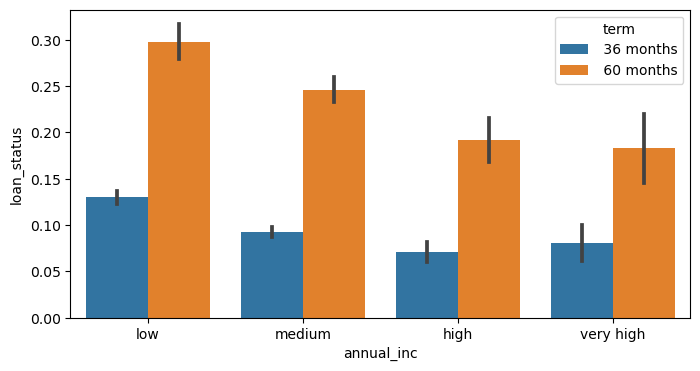

In [116]:
# Let us now see how default rate varies across annual income and term
plt.figure(figsize=[8, 4])
sns.barplot(x='annual_inc', y="loan_status", hue='term', data=loan_info_df)
plt.show()

***For all income class there is a sharp increase in default rate from 36 to 60 month loan term***

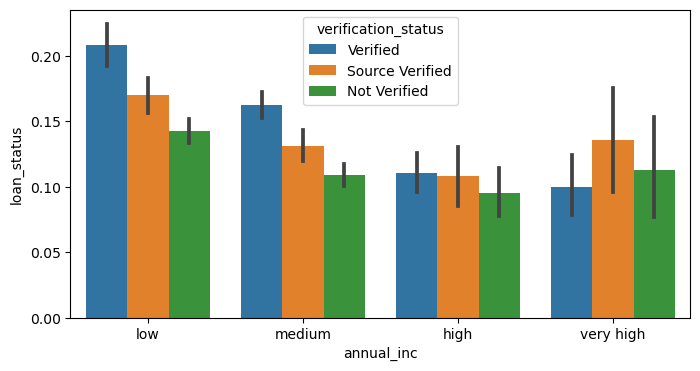

In [118]:
# Let us now see how default rate varies across annual income and verification status
plt.figure(figsize=[8, 4])
sns.barplot(x='annual_inc', y="loan_status", hue='verification_status', data=loan_info_df)
plt.show()

***Except very high income category verification status shows anti pattern***

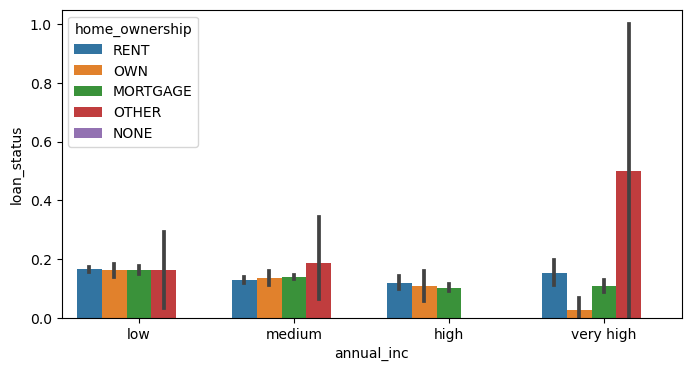

In [119]:
# To analyze how home ownership data impacts loan status for different income group
plt.figure(figsize=[8, 4])
sns.barplot(x='annual_inc', y="loan_status", hue='home_ownership', data=loan_info_df)
plt.show()

***For very high income group, 'Other' category seems to have abnormal tendency to default***

In [120]:
# To analyze how bankruptcy data impacts loan status let us first remove all empty values 
loan_info_df.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

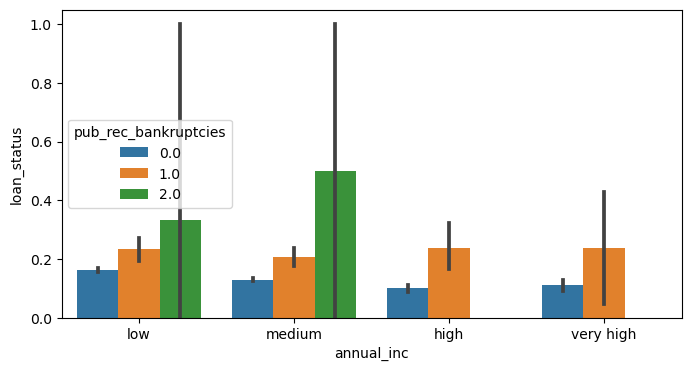

In [121]:
# Plot the data in barplot
plt.figure(figsize=[8, 4])
sns.barplot(x='annual_inc', y="loan_status", hue='pub_rec_bankruptcies', data=loan_info_df)
plt.show()

***Users with 2 or more public record bankruptcy present high risk***

#### Effect of Categorical variable on default rate
We can see how target variable increase or decrease across categories to understand how strong the associations are
We can see how default rate changes for categories in %

In [122]:
# Variation of default rate across annual_inc
loan_info_df.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.164616
medium       0.133338
very high    0.112802
high         0.104139
Name: loan_status, dtype: float64

***The default rate has increased by around 6% from high to low income class***

In [123]:
# Converting above logic to a function for reusability
def diff_rate(cat_var):
    default_rates = loan_info_df.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

# Filtering all the object type variables
loan_categorical = loan_info_df.loc[:, loan_info_df.dtypes == object]
loan_categorical['loan_status'] = loan_info_df['loan_status']

# Iterate the list of all categorical variables and find the deviation 
d = {key: diff_rate(key)[1]*100 for key in loan_categorical.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 7.000000000000001, 'term': 15.0, 'int_rate': 19.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_title': 100.0, 'home_ownership': 4.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'pymnt_plan': 0.0, 'purpose': 6.0, 'initial_list_status': 0.0}
